# Predicción de Ventas de Helados Basada en la Temperatura

En este notebook, vamos a crear un modelo para predecir la cantidad de helados vendidos en función de la temperatura máxima del día. Utilizaremos un modelo de regresión lineal simple con descenso del gradiente, implementado con una única neurona y una función de activación lineal. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Datos Extraídos

Los datos que utilizaremos contienen la temperatura máxima del día y la cantidad de helados vendidos ese día. Vamos a empezar representando estos datos en nuestro código.

| Temperatura (°C) | Helados Vendidos |
|-----------------|------------------|
| 23.4            | 44               |
| 25.1            | 65               |
| 27.5            | 99               |
| 28.2            | 117              |
| 28.6            | 135              |
| 31.0            | 213              |
| 32.1            | 165              |
| 32.4            | 141              |
| 33.9            | 249              |
| 34.1            | 225              |
| 35.9            | 271              |
| 36.7            | 243              |
| 38.0            | 284              |

In [2]:
# Datos extraídos
temperaturas = np.array([23.4, 25.1, 27.5, 28.2, 28.6, 31.0, 32.1, 32.4, 33.9, 34.1, 35.9, 36.7, 38.0])
helados_vendidos = np.array([44, 65, 99, 117, 135, 213, 165, 141, 249, 225, 271, 243, 284])

## Normalización de los Datos

Para facilitar el entrenamiento del modelo, normalizaremos los datos de entrada (temperatura) y de salida (helados vendidos) para que se encuentren en un rango entre 0 y 1.

In [3]:
# Normalización de los datos
temperaturas_norm = (temperaturas - np.min(temperaturas)) / (np.max(temperaturas) - np.min(temperaturas))
helados_vendidos_norm = (helados_vendidos - np.min(helados_vendidos)) / (np.max(helados_vendidos) - np.min(helados_vendidos))

## Inicialización de los Parámetros

Inicializamos los parámetros del modelo: el peso (`w`) y el sesgo (`b`) con valores aleatorios. También definimos la tasa de aprendizaje (`learning_rate`) y el número de épocas (`epochs`) para el entrenamiento.

Un modelo lineal se define mediante la siguiente ecuación:

$$ y = w \cdot x + b $$

donde:
- $w$ es el peso que representa la pendiente de la línea.
- $b$ es el sesgo o intersección, que representa el punto donde la línea cruza el eje y.
- $x$ es la variable de entrada (temperatura).
- $y$ es la salida predicha (helados vendidos).

En cada iteración del descenso del gradiente, se actualizan los valores de $w$ y $b$ para reducir la pérdida.

In [4]:
# Inicialización de los parámetros
w = np.random.rand()
b = np.random.rand()
learning_rate = 0.1
epochs = 1000

## Función de Pérdida

Utilizaremos el error cuadrático medio (MSE) como función de pérdida para evaluar qué tan bien nuestro modelo está ajustando los datos. La fórmula del MSE es la siguiente:

$$ L = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2 $$

donde:
- $y_i$ son los valores reales.
- $\hat{y_i}$ son los valores predichos por el modelo.
- $n$ es el número total de ejemplos.

In [5]:
# Función de pérdida: Error cuadrático medio
def loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

## Entrenamiento del Modelo con Descenso del Gradiente

Entrenaremos el modelo utilizando el descenso del gradiente. En cada iteración, actualizaremos los parámetros `w` y `b` para reducir la pérdida.

El descenso del gradiente se define mediante las siguientes fórmulas de actualización para los parámetros:

- Para el peso $w$:
  
  $$ w = w - \alpha \frac{\partial L}{\partial w} $$

- Para el sesgo $b$:
  
  $$ b = b - \alpha \frac{\partial L}{\partial b} $$

donde:
- $\alpha$ es la tasa de aprendizaje.
- $\frac{\partial L}{\partial w}$ y $\frac{\partial L}{\partial b}$ son las derivadas parciales de la pérdida con respecto a $w$ y $b$, respectivamente.

In [6]:
# Descenso del gradiente
loss_history = []
for epoch in range(epochs):
    # Cálculo de la predicción
    y_pred = w * temperaturas_norm + b
    
    # Cálculo del error
    current_loss = loss(helados_vendidos_norm, y_pred)
    loss_history.append(current_loss)
    
    # Cálculo de gradientes
    dw = -2 * np.mean((helados_vendidos_norm - y_pred) * temperaturas_norm)
    db = -2 * np.mean(helados_vendidos_norm - y_pred)
    
    # Actualización de los parámetros
    w -= learning_rate * dw
    b -= learning_rate * db

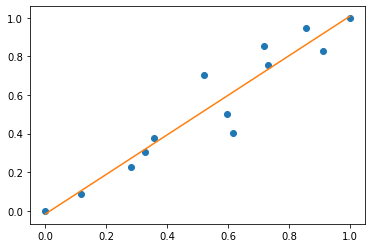

In [7]:
# dibujar la gráfica con los resultados normalizados

plt.plot(temperaturas_norm, helados_vendidos_norm, 'o', label='Datos')
plt.plot(temperaturas_norm, w * temperaturas_norm + b, label='Ajuste')

## Desnormalización de los Resultados

Para interpretar mejor los resultados, desnormalizaremos los parámetros obtenidos (`w` y `b`) para poder aplicarlos directamente a los datos originales.

In [8]:
# Desnormalizar los resultados para interpretación
w_denorm = w * (np.max(helados_vendidos) - np.min(helados_vendidos)) / (np.max(temperaturas) - np.min(temperaturas))
b_denorm = (b * (np.max(helados_vendidos) - np.min(helados_vendidos))) + np.min(helados_vendidos) - w_denorm * np.min(temperaturas)

print(f"Pendiente (w): {w_denorm}")
print(f"Intersección (b): {b_denorm}")

Pendiente (w): 16.841009610638004
Intersección (b): -353.9697450872623


## Visualización de la Pérdida

Vamos a visualizar cómo la pérdida cambia durante el entrenamiento para verificar si nuestro modelo está aprendiendo adecuadamente.

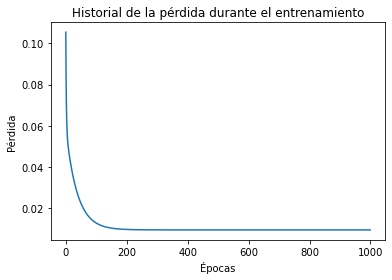

In [9]:
# Visualización de la pérdida
plt.plot(loss_history)
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Historial de la pérdida durante el entrenamiento')
plt.show()


## Visualización de los Datos y la Línea Ajustada

Finalmente, visualizaremos los datos reales y la línea ajustada por nuestro modelo para evaluar la calidad del ajuste.

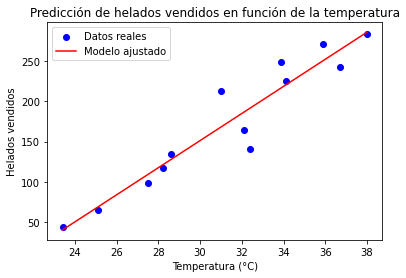

In [13]:
# Visualización de los datos y la línea ajustada
plt.scatter(temperaturas, helados_vendidos, color='blue', label='Datos reales')
plt.plot(temperaturas, w_denorm * temperaturas + b_denorm, color='red', label='Modelo ajustado')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Helados vendidos')
plt.title('Predicción de helados vendidos en función de la temperatura')
plt.legend()
plt.show()

## Resolución del Problema de Manera Analítica: Regresión Lineal Simple

Ahora vamos a resolver el problema utilizando la regresión lineal simple de la librería `scikit-learn`. Esto nos permitirá comparar los resultados obtenidos mediante descenso del gradiente y la solución analítica.

La regresión lineal simple se define mediante la misma ecuación que hemos utilizado anteriormente:

$$ y = w \cdot x + b $$

En este caso, `scikit-learn` calculará automáticamente los valores óptimos para `w` y `b`.

Pendiente (w) - scikit-learn: 16.841026481921784
Intersección (b) - scikit-learn: -353.9702827303056


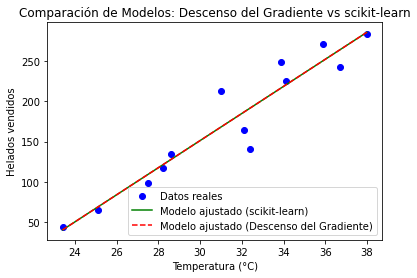

In [11]:
# Resolución del problema de manera analítica con scikit-learn
from sklearn.linear_model import LinearRegression

# Redimensionar los datos para la regresión lineal de scikit-learn
temperaturas_reshape = temperaturas.reshape(-1, 1)

# Crear y ajustar el modelo de regresión lineal
regresion_model = LinearRegression()
regresion_model.fit(temperaturas_reshape, helados_vendidos)

# Obtener los parámetros del modelo
w_sklearn = regresion_model.coef_[0]
b_sklearn = regresion_model.intercept_

print(f"Pendiente (w) - scikit-learn: {w_sklearn}")
print(f"Intersección (b) - scikit-learn: {b_sklearn}")

# Visualización de los datos y la línea ajustada por scikit-learn
plt.scatter(temperaturas, helados_vendidos, color='blue', label='Datos reales')
plt.plot(temperaturas, w_sklearn * temperaturas + b_sklearn, color='green', label='Modelo ajustado (scikit-learn)')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Helados vendidos')
plt.title('Comparación de Modelos: Descenso del Gradiente vs scikit-learn')
plt.plot(temperaturas, w_denorm * temperaturas + b_denorm, color='red', linestyle='--', label='Modelo ajustado (Descenso del Gradiente)')
plt.legend()
plt.show()